In [1]:
import datetime
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("archive/ASIANPAINT.csv")
df.head()



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


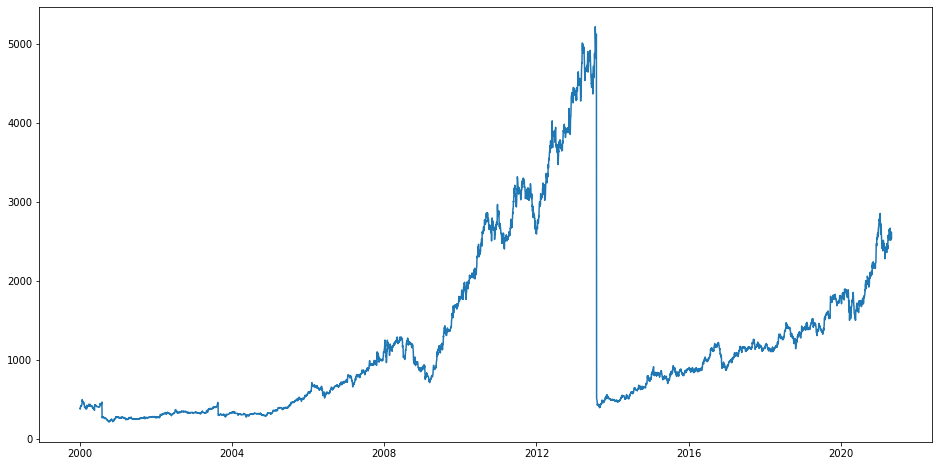

In [3]:
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df['Date']
plt.figure(figsize=(16, 8))
plt.plot(df["Close"], label='Close Price history')

In [9]:
data=df.sort_index(ascending=True,axis=0)
# new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

new_dataset = data[['Open','Close', 'High', 'Low', 'Last']].astype(float)

In [10]:
new_dataset["Month"] = data["Date"].dt.month
new_dataset["Day"] = data["Date"].dt.day
# new_dataset.plot.line()

# for i in range(0,len(data)):
#     new_dataset["Date"][i]=data['Date'][i].timestamp()
#     new_dataset["Month"][i] = data['Date'][i].month
#     new_dataset["Close"][i]=data["Close"][i]
# new_dataset

,Open,Close,High,Low,Last,Month,Day
Date,,,,,,,
2000-01-03,370.0,381.65,390.00,370.00,385.0,1,3
2000-01-04,380.0,385.55,392.00,375.00,390.0,1,4
2000-01-05,371.5,383.00,390.00,371.50,383.0,1,5
2000-01-06,384.9,377.50,384.90,374.50,375.1,1,6
2000-01-07,376.0,385.70,390.00,370.00,389.0,1,7
...,...,...,...,...,...,...,...
2021-04-26,2530.0,2557.90,2575.00,2530.00,2558.0,4,26
2021-04-27,2545.0,2574.35,2579.90,2534.00,2571.0,4,27
2021-04-28,2588.0,2614.55,2620.25,2575.00,2612.0,4,28


In [11]:
partition_point = int(len(new_dataset) * 0.9)

scalerX = MinMaxScaler(feature_range=(0,2))
scaled_data = scalerX.fit_transform(new_dataset)

train_data = scaled_data[:partition_point]
test_data = scaled_data[partition_point:]
# train_data[0:60]
print("shape of train_data", train_data.shape)
print("shape of test_data", test_data.shape)

shape of train_data (4775, 7)
shape of test_data (531, 7)


In [12]:
# new_dataset.index=new_dataset.Date
# new_dataset.drop("Date",axis=1,inplace=True)

x_train_data, y_train_data = [], []
for i in range(60,len(train_data)):
    x_train_data.append(train_data[i-60:i])
    y_train_data.append(train_data[i,1])
    
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
# x_train_data = np.reshape(x_train_data,(x_train_data.shape[0], x_train_data.shape[1], 1))
print("shape of x_train_data", x_train_data.shape)
print("shape of y_train_data", y_train_data.shape)


shape of x_train_data (4715, 60, 7)
shape of y_train_data (4715,)


In [13]:
new_dataset


,Open,Close
Date,,
2000-01-03,370.0,381.65
2000-01-04,380.0,385.55
2000-01-05,371.5,383.00
2000-01-06,384.9,377.50
2000-01-07,376.0,385.70
...,...,...
2021-04-26,2530.0,2557.90
2021-04-27,2545.0,2574.35
2021-04-28,2588.0,2614.55


In [15]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=64, return_sequences=True,input_shape=(x_train_data.shape[1], 7)))
lstm_model.add(LSTM(units=32))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            18432     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


In [16]:
lstm_model.fit(x_train_data, y_train_data,epochs=3,batch_size=1,verbose=2)

Epoch 1/10
4715/4715 - 66s - loss: 0.0055 - 66s/epoch - 14ms/step
Epoch 2/10
4715/4715 - 56s - loss: 0.0024 - 56s/epoch - 12ms/step
Epoch 3/10
4715/4715 - 52s - loss: 0.0019 - 52s/epoch - 11ms/step
Epoch 4/10
4715/4715 - 51s - loss: 0.0017 - 51s/epoch - 11ms/step
Epoch 5/10
4715/4715 - 52s - loss: 0.0018 - 52s/epoch - 11ms/step
Epoch 6/10
4715/4715 - 58s - loss: 0.0014 - 58s/epoch - 12ms/step
Epoch 7/10
4715/4715 - 87s - loss: 0.0012 - 87s/epoch - 18ms/step
Epoch 8/10
4715/4715 - 70s - loss: 0.0015 - 70s/epoch - 15ms/step
Epoch 9/10
4715/4715 - 54s - loss: 0.0013 - 54s/epoch - 11ms/step
Epoch 10/10
4715/4715 - 57s - loss: 0.0013 - 57s/epoch - 12ms/step


In [20]:
X_test = []
valid_data = pd.DataFrame(index=range(0,len(test_data) - 60),columns=['Date','Close'])
for i in range(60, test_data.shape[0]):
    X_test.append(test_data[i-60:i])
    valid_data["Date"][i-60] = data['Date'][partition_point + i]
    valid_data["Close"][i-60]= new_dataset["Close"][partition_point + i]

X_test = np.array(X_test)
# X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = np.repeat(predicted_closing_price, 7, axis=-1)
predicted_closing_price = scalerX.inverse_transform(predicted_closing_price)[:, 1]

In [21]:
print("shape of test_data", test_data.shape)
print("shape of predicted_closing_price", predicted_closing_price.shape)
# predicted_closing_price

shape of test_data (531, 7)
shape of predicted_closing_price (471,)


<AxesSubplot:xlabel='Date'>

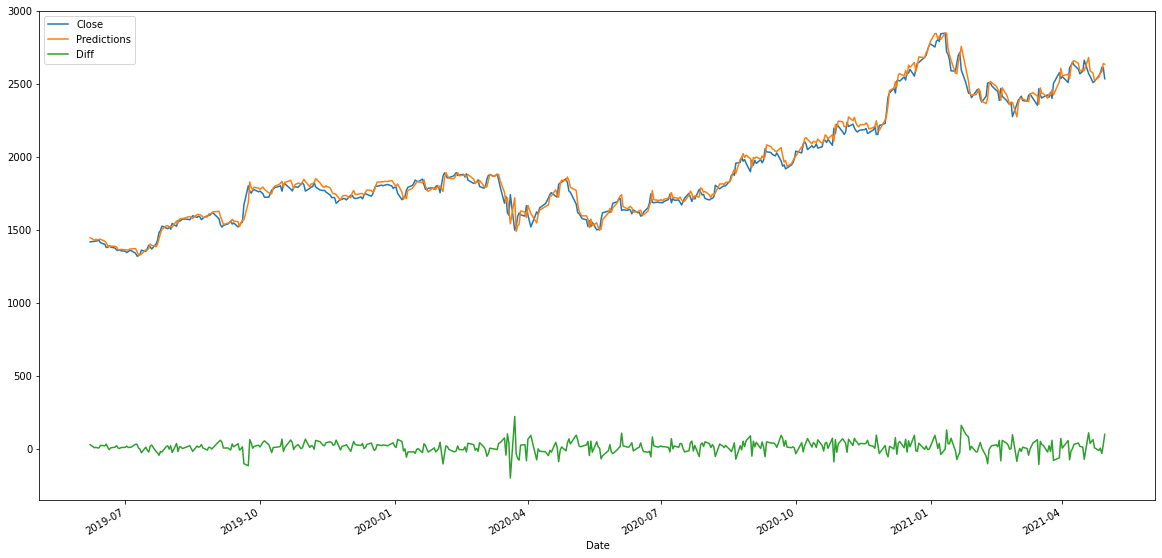

In [22]:
valid_data.index=valid_data.Date
valid_data.drop("Date",axis=1,inplace=True)
valid_data['Predictions'] = predicted_closing_price
valid_data['Diff'] =valid_data['Close'] - valid_data['Predictions'] 
valid_data.plot.line()

In [24]:
# lstm_model.save("saved_model.h5")
valid_data['Diff'].sum()


6201.342773437496